___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

 NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. T
We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).


The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 


The "useful" and "funny" columns are similar to the "cool" column.


## Imports

In [1]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## The Data


In [2]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

Let's explore the data

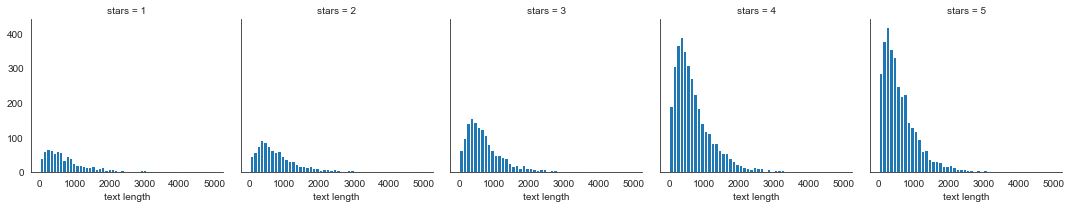

In [7]:
sns.set_style('white')
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

**Create a boxplot of text length for each star category.**

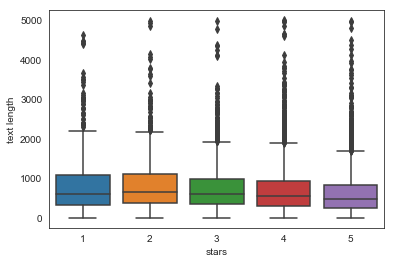

In [8]:
sns.boxplot(x='stars', y = 'text length',data = yelp)

**Create a countplot of the number of occurrences for each type of star rating.**

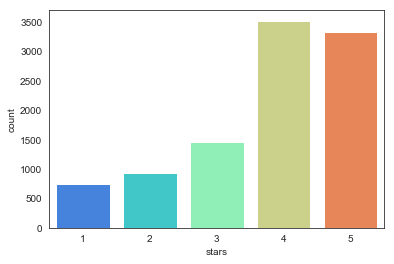

In [10]:
sns.countplot(x ='stars',data=yelp,palette='rainbow')

In [16]:
stars = yelp.groupby('stars').mean()


In [17]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


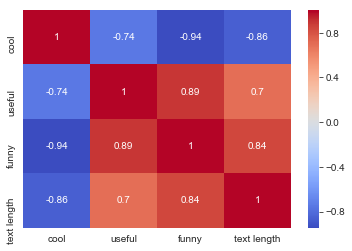

In [19]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

 reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [24]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [26]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [27]:
X = yelp_class['text']
Y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()

In [31]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.


In [32]:
from sklearn.cross_validation import train_test_split


In [36]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state = 42)

## Training a Model

Time to train a model!


In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


**Now fit nb using the training data.**

In [39]:
nb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

**Use the predict method off of nb to predict labels from X_test.**

In [41]:
Y_pred = nb.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[156  77]
 [ 37 956]]
             precision    recall  f1-score   support

          1       0.81      0.67      0.73       233
          5       0.93      0.96      0.94       993

avg / total       0.90      0.91      0.90      1226



**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipeline = Pipeline([('cv',CountVectorizer()),
         ('tfif',TfidfTransformer()),
         ('classifier',MultinomialNB())])

## Using the Pipeline


### Train Test Split

**Redo the train test split on the yelp_class object.**

In [63]:
X = yelp_class['text']
Y = yelp_class['stars']
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state = 42)

In [67]:
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [65]:
Y_pred = pipeline.predict(X_test)

In [66]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[  1 232]
 [  0 993]]
             precision    recall  f1-score   support

          1       1.00      0.00      0.01       233
          5       0.81      1.00      0.90       993

avg / total       0.85      0.81      0.73      1226



Looks like Tf-Idf actually made things worse!